# Data Exploration - Making Sense of Google Search Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_bitcoin = pd.read_csv("data/Bitcoin Search Trend.csv")
df_bitcoin_daily = pd.read_csv("data/Daily Bitcoin Price.csv")
df_tesla = pd.read_csv("data/TESLA Search Trend vs Price.csv")
df_unemployment = pd.read_csv("data/UE Benefits Search vs UE Rate 2004-19.csv")

### What are the shapes of the DataFrames?

### How many rows & columns do they have?

In [2]:
df_tesla.shape

(124, 3)

In [3]:
df_unemployment.shape

(181, 3)

In [4]:
df_bitcoin.shape

(73, 2)

In [5]:
df_bitcoin_daily.shape

(2204, 3)

### What are the column names?

In [6]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [7]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [8]:
df_bitcoin.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [9]:
df_bitcoin_daily.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

### What is the largest number in the search data column? Try using the `.describe()` function.

In [10]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [11]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [12]:
df_bitcoin.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [13]:
df_bitcoin_daily.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


### What do the Search Numbers mean?

We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as: 

> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.



For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

Here are the Google Trends Search Parameters that I used to generate the .csv data:

- "Tesla", Worldwide, Web Search

- "Bitcoin", Worldwide, News Search

- "Unemployment Benefits", United States, Web Search

# Data Cleaning - Resampling Time Series Data

First, we have to identify if there are any missing or junk values in our DataFrames.

Can you investigate all 4 DataFrames and find if there are any missing values? 

If yes, find how many missing or NaN values there are. Then, find the row where the missing values occur.

In [14]:
print("TESLA Search Trend vs Price:", df_tesla.isna().values.any())
print("UE Benefits Search vs UE Rate:", df_unemployment.isna().values.any())
print("Bitcoint Search Trend:", df_bitcoin.isna().values.any())
print("Daily Bitcoin Price:", df_bitcoin_daily.isna().values.any())

TESLA Search Trend vs Price: False
UE Benefits Search vs UE Rate: False
Bitcoint Search Trend: False
Daily Bitcoin Price: True


In [15]:
df_bitcoin_daily[df_bitcoin_daily.isna().any(axis=1)]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [16]:
df_bitcoin_daily = df_bitcoin_daily.drop(2148)

In [17]:
print("Daily Bitcoin Price:", df_bitcoin_daily.isna().values.any())

Daily Bitcoin Price: False


This works too

```python
# df_bitcoin_daily = df_bitcoin_daily.dropna()

# inplace allows to overwrite the DataFrame
df_bitcoin_daily.dropna(inplace=True)
```

Our DataFrames contain time-series data. Do you remember how to check the data type of the entries in the DataFrame? Have a look at the data types of the MONTH or DATE columns. Convert any strings you find into Datetime objects. Do this for all 4 DataFrames. Double-check if your type conversion was successful.

In [18]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [19]:
print(df_tesla['MONTH'].dtype)
type(df_tesla['MONTH'][0])

object


str

In [20]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [21]:
print(df_tesla['MONTH'].dtype)
type(df_tesla['MONTH'][0])

datetime64[ns]


pandas._libs.tslibs.timestamps.Timestamp

In [22]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   181 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64  
 2   UNRATE                  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [23]:
type(df_unemployment.MONTH[0][1])

str

In [24]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [25]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [26]:
type(df_bitcoin.MONTH[1])

str

In [27]:
df_bitcoin.MONTH = pd.to_datetime(df_bitcoin.MONTH)

In [28]:
type(df_bitcoin.MONTH[1])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
df_bitcoin_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2203 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2203 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 68.8+ KB


In [30]:
type(df_bitcoin_daily.DATE[1])

str

In [31]:
df_bitcoin_daily.DATE = pd.to_datetime(df_bitcoin_daily.DATE)

In [32]:
type(df_bitcoin_daily.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

### Resampling Time Series Data

Next, we have to think about how to make our Bitcoin price and our Bitcoin search volume comparable. Our Bitcoin price is daily data, but our Bitcoin Search Popularity is monthly data.

To convert our daily data into monthly data, we're going to use the [.resample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use `'M'`.  If you ever need to resample a time series to a different frequency, you can find a list of different options [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) (for example `'Y'` for yearly or `'T'` for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.



In [33]:
df_btc_monthly = df_bitcoin_daily.resample('ME', on='DATE').last()


If we wanted the average price over the course of the month, we could use something like:



In [34]:
df_btc_monthly = df_bitcoin_daily.resample('ME', on='DATE').mean()

In [35]:
df_btc_monthly = df_bitcoin_daily.resample('ME', on='DATE').last()
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation - Tesla Line Charts in Matplotlib

Let's create a basic line chart of the Tesla stock price and the search popularity and then gradually add more and more styling to our chart.

Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes:

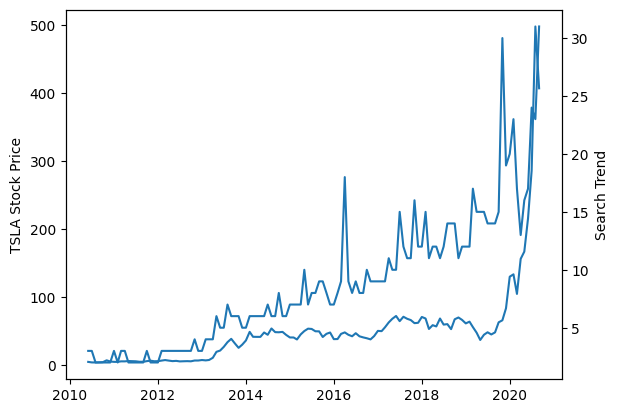

In [36]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')


# ax1.plot('MONTH', 'TSLA_WEB_SEARCH', data=df_tesla)
# ax2.plot('MONTH', 'TSLA_USD_CLOSE', data=df_tesla)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

Now let's style the chart a bit more. In particular, let's check out the different colors you can use with Matplotlib.

For our updated chart, let's differentiate the two lines and the axis labels using different colors. Try using one of the blue [color names](https://matplotlib.org/stable/gallery/color/named_colors.html) for the search volume and a [HEX code](https://htmlcolorcodes.com/color-picker/) for a red color for the stock price.

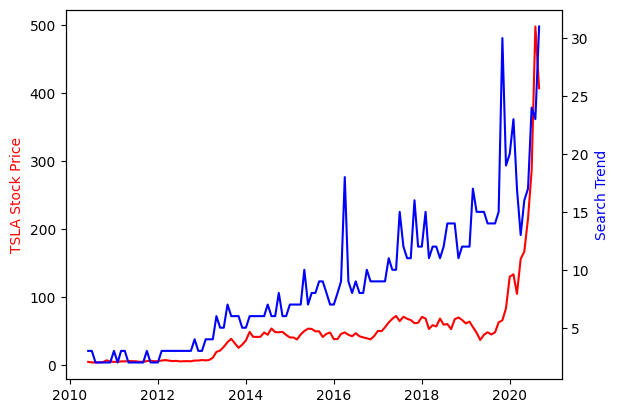

In [37]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#FF0000')
ax2.set_ylabel('Search Trend', color='blue')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF0000')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="blue")

There are still some ways to improve the look of this chart. First off, let's make it larger. Can you make the following changes:

- Increase the figure size (e.g., to 14 by 8).

- Increase the font sizes for the labels and the ticks on the x-axis to 14.

- Rotate the text on the x-axis by 45 degrees.

- Add a title that reads 'Tesla Web Search vs Price'

- Make the lines on the chart thicker.

- Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html).

- Set minimum and maximum values for the y and x-axis. Hint: check out methods like [set_xlim()](http://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).

- Finally use plt.show() to display the chart below the cell instead of relying on the automatic notebook output.

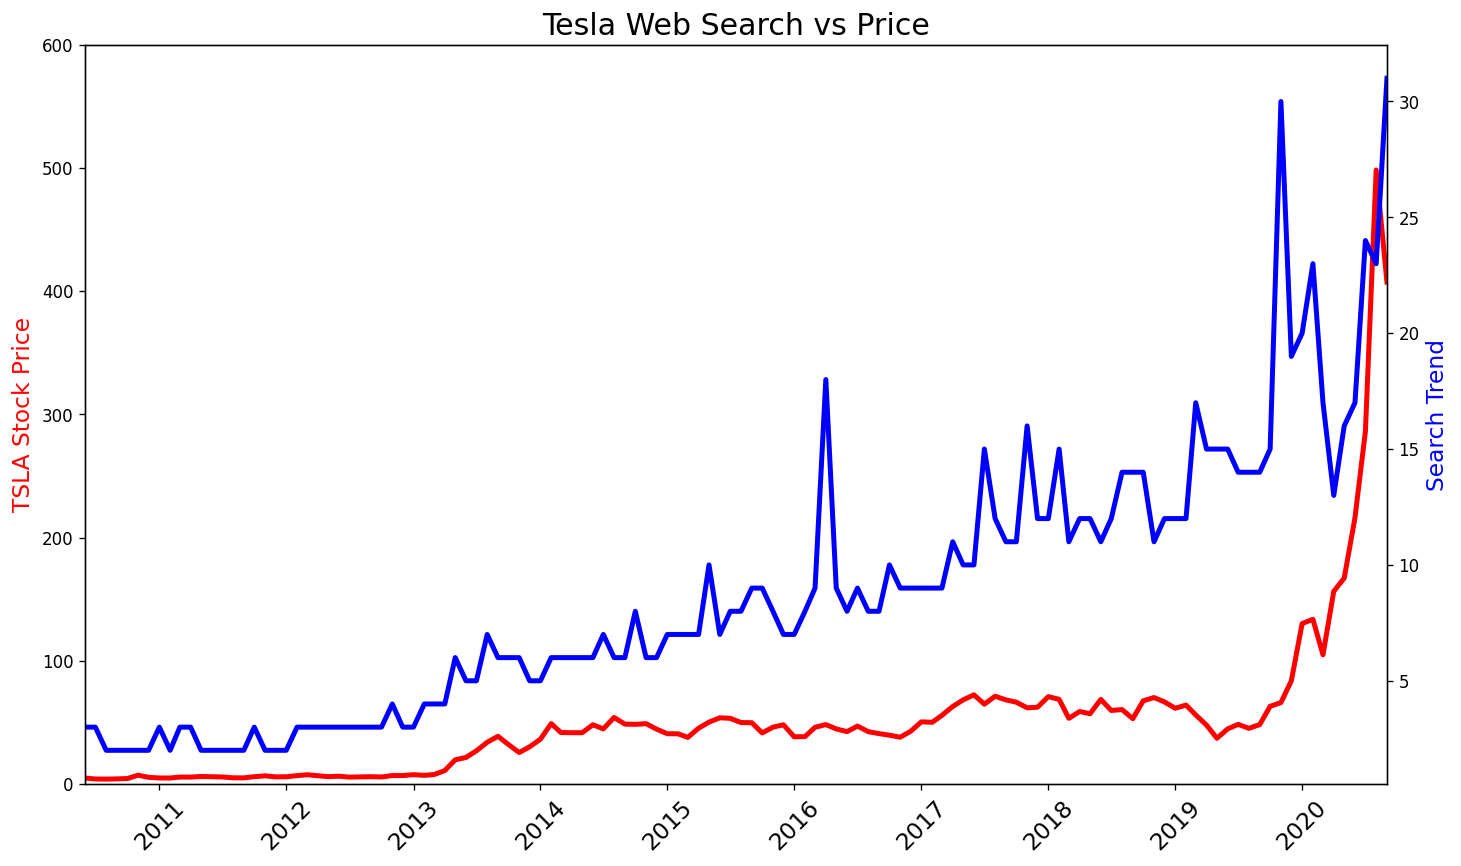

In [38]:
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title("Tesla Web Search vs Price", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#FF0000', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

# plt.ylim([0, 600])
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF0000', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="blue", linewidth=3)

plt.show()

# Using Locators and DateFormatters to generate Tick Marks on a Time Line

## Adding Locator Tick Marks

When working with time series, it's often quite difficult to get the tick marks on charts looking the way you want to. This is why we have Locator helpers.

The first step is importing matplotlib.dates.  This is where all the date plotting capabilities live.

In [39]:
import matplotlib.dates as mdates

Next, we need a `YearLocator()` and a `MonthLocator()` objects, which will help Matplotlib find the years and the months. Then we also need a `DateFormatter()`, which will help us specify how we want to display the dates. 

In [40]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

Now we can go back to our chart and format where the major and minor ticks should be using the Locators.

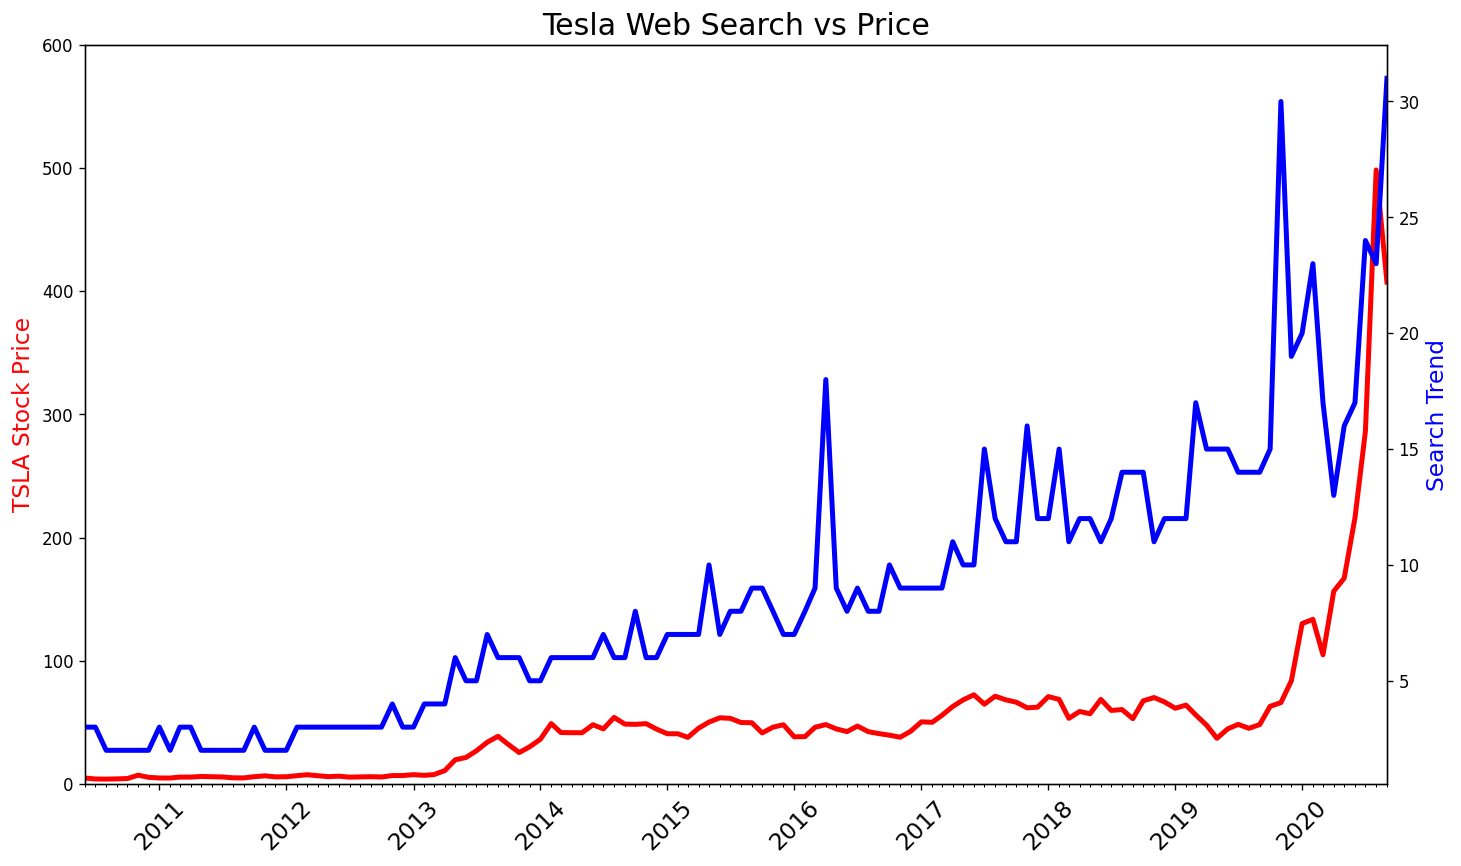

In [41]:
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title("Tesla Web Search vs Price", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#FF0000', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF0000', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="blue", linewidth=3)

When we take a look at our chart, we can see the tick marks nicely. The tick marks also allow us to visually date that spike of interest in the middle of the chart - March 2016. This was when the Tesla Model 3 was unveiled. Also, we can clearly see that the most recent spikes in search coincide, not with the release of a new car, but the roaring stock price for the company!

# Data Visualisation - Bitcoin: Line Style and Markers

Now that we've got Tesla looking the way we want it to, let's do the same for Bitcoin. We've already matched the sample frequency and we can re-use our chart! Simply copy-paste the entire cell and make some modifications to the code.
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price'

2. Change the y-axis label to 'BTC Price'

3. Change the y- and x-axis limits to improve the appearance

4. Investigate the [linestyles](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to make the BTC closing price a dashed line

5. Investigate the [marker types](https://matplotlib.org/stable/api/markers_api.html) to make the search datapoints little circles

6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

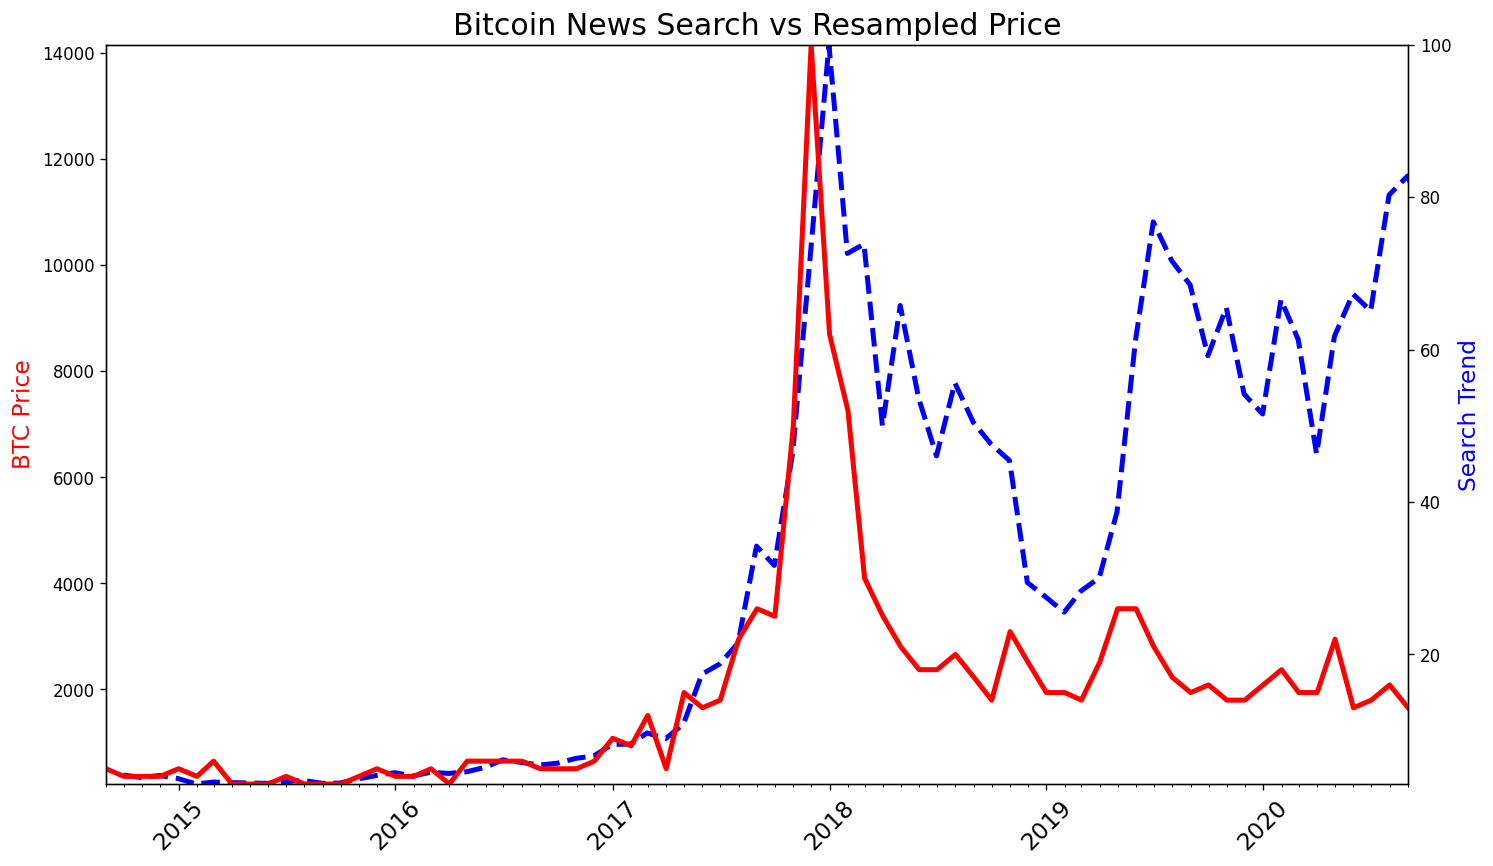

In [ ]:
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#FF0000', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

ax1.set_ylim([df_btc_monthly.CLOSE.min(), df_btc_monthly.CLOSE.max()])
ax1.set_xlim([df_bitcoin.MONTH.min(), df_bitcoin.MONTH.max()])
ax2.set_ylim([df_bitcoin.BTC_NEWS_SEARCH.min(), df_bitcoin.BTC_NEWS_SEARCH.max()])

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color="blue", linewidth=3, linestyle='dashed')
ax2.plot(df_bitcoin.MONTH, df_bitcoin.BTC_NEWS_SEARCH, color='#FF0000', linewidth=3, markers=11)